## LGM-VIP Data Science Internship Programme

Intermediate Level

## Task-2

Author - SONAL SINGH

## Exploratory Data Analysis on Dataset - Terrorism 

As a security/defense analyst, try to find out the hot zone of terrorism.
Dataset: https://bit.ly/2TK5Xn5


In [1]:
#Importing useful libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing datas
dataset = pd.read_csv('C:/Users/sonal/Lets Grow More/Task2Dataset.csv',encoding='iso-8859-1')

C:\Users\sonal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#reading the top datas
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataset.shape

(181691, 135)

In [5]:
dataset.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state'
                             ,'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                             'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                             'motive':'Motive','success':'Success'},inplace=True)
dataset

,Event_ID,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
dataset.isnull().sum()

Event_ID           0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
#Checking for duplicate values
duplicates = dataset[dataset.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Event_ID, Year, Month, Day, approxdate, extended, resolution, country, Country, region, Region, state, city, latitude, longitude, specificity, vicinity, location, Summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, Success, suicide, attacktype1, AttackType, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, Target_type, targsubtype1, targsubtype1_txt, corp1, Target, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, Group, gsubname, gname2, gsubname2, gname3, gsubname3, Motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, Weapon_type, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtyp

In [8]:
#Choose the data you need
dataset = dataset[['Event_ID','Year','Month','Day','Country','Region','region','state','latitude','longitude','Success','AttackType','attacktype1'
               ,'Target_type','targtype1','Target','natlty1_txt','Killed','Wounded','Motive','city','Weapon_type','Group']]
dataset

,Event_ID,Year,Month,Day,Country,Region,region,state,latitude,longitude,...,Target_type,targtype1,Target,natlty1_txt,Killed,Wounded,Motive,city,Weapon_type,Group
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,2,NaN,18.456792,-69.951164,...,Private Citizens & Property,14,Julio Guzman,Dominican Republic,1.0,0.0,NaN,Santo Domingo,Unknown,MANO-D
1,197000000002,1970,0,0,Mexico,North America,1,Federal,19.371887,-99.086624,...,Government (Diplomatic),7,"Nadine Chaval, daughter",Belgium,0.0,0.0,NaN,Mexico city,Unknown,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,5,Tarlac,15.478598,120.599741,...,Journalists & Media,10,Employee,United States,1.0,0.0,NaN,Unknown,Unknown,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,8,Attica,37.997490,23.762728,...,Government (Diplomatic),7,U.S. Embassy,United States,NaN,NaN,NaN,Athens,Explosives,Unknown
4,197001000003,1970,1,0,Japan,East Asia,4,Fukouka,33.580412,130.396361,...,Government (Diplomatic),7,U.S. Consulate,United States,NaN,NaN,NaN,Fukouka,Incendiary,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,11,Middle Shebelle,2.359673,45.385034,...,Military,4,Checkpoint,Somalia,1.0,2.0,NaN,Ceelka Geelow,Firearms,Al-Shabaab
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,10,Lattakia,35.407278,35.942679,...,Military,4,Hmeymim Air Base,Russia,2.0,7.0,NaN,Jableh,Explosives,Muslim extremists
181688,201712310030,2017,12,31,Philippines,Southeast Asia,5,Maguindanao,6.900742,124.437908,...,Private Citizens & Property,14,Houses,Philippines,0.0,0.0,NaN,Kubentog,Incendiary,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,12,31,India,South Asia,6,Manipur,24.798346,93.940430,...,Government (General),2,Office,India,0.0,0.0,NaN,Imphal,Explosives,Unknown


In [9]:
#Statistical findings
dataset.describe() # descrise()is used to find  satstical sata like mean meadian , standard deviation ,etc.

,Event_ID,Year,Month,Day,region,latitude,longitude,Success,attacktype1,targtype1,Killed,Wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,7.160938,23.498343,-4.586957e+02,0.889598,3.247547,8.439719,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,2.933408,18.569242,2.047790e+05,0.313391,1.915772,6.653838,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,1.000000,-53.154613,-8.618590e+07,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,5.000000,11.510046,4.545640e+00,1.000000,2.000000,3.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,6.000000,31.467463,4.324651e+01,1.000000,3.000000,4.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,10.000000,34.685087,6.871033e+01,1.000000,3.000000,14.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,12.000000,74.633553,1.793667e+02,1.000000,9.000000,22.000000,1570.000000,8191.000000


In [10]:
#Summary of the dataset
dataset.info() #info is used to find the data of all columns and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Event_ID     181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   region       181691 non-null  int64  
 7   state        181270 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  Success      181691 non-null  int64  
 11  AttackType   181691 non-null  object 
 12  attacktype1  181691 non-null  int64  
 13  Target_type  181691 non-null  object 
 14  targtype1    181691 non-null  int64  
 15  Target       181055 non-null  object 
 16  natlty1_txt  180132 non-null  object 
 17  Killed       171378 non-null  float64
 18  Wounded      165380 non-

In [11]:
#Having a look at all the data
dataset['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [12]:
dataset['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [13]:
dataset['Country'].value_counts()

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
Falkland Islands         1
International            1
Wallis and Futuna        1
North Korea              1
New Hebrides             1
Name: Country, Length: 205, dtype: int64

In [14]:
dataset['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [15]:
dataset['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [16]:
dataset['city'].value_counts()

Unknown       9775
Baghdad       7589
Karachi       2652
Lima          2359
Mosul         2265
              ... 
Mandiala         1
Vigilancia       1
Smilkovci        1
Fulkumari        1
H'doura          1
Name: city, Length: 36674, dtype: int64

## Finding correlation

Used of numerical, not categorical data.
Shows relations between features lighter area= very good correlation
One of the fastest ways to strengthen a model is to identify and reduce the features in the dataset that are highly correlated
Correlation between variables means that both independent variables have a relationship with each other

In [17]:
corr = dataset.corr()
corr

,Event_ID,Year,Month,Day,region,latitude,longitude,Success,attacktype1,targtype1,Killed,Wounded
Event_ID,1.000000,0.999996,0.002706,0.018336,0.401371,0.166886,0.003907,-0.082972,0.074173,0.079080,0.015351,0.015282
Year,0.999996,1.000000,0.000139,0.018254,0.401384,0.166933,0.003917,-0.082963,0.074153,0.079082,0.015341,0.015273
Month,0.002706,0.000139,1.000000,0.005497,-0.002999,-0.015978,-0.003880,-0.002845,0.006705,-0.000948,0.003463,0.002938
Day,0.018336,0.018254,0.005497,1.000000,0.009710,0.003423,-0.002285,-0.011802,-0.005333,-0.000052,-0.003693,-0.001268
region,0.401371,0.401384,-0.002999,0.009710,1.000000,0.309274,0.004351,-0.030909,0.007642,0.041396,0.042062,0.020472
latitude,0.166886,0.166933,-0.015978,0.003423,0.309274,1.000000,0.001463,-0.073715,0.010135,-0.022805,-0.018124,0.015988
longitude,0.003907,0.003917,-0.003880,-0.002285,0.004351,0.001463,1.000000,-0.000858,0.001554,-0.003418,-0.000562,0.000223
Success,-0.082972,-0.082963,-0.002845,-0.011802,-0.030909,-0.073715,-0.000858,1.000000,0.048408,-0.059637,0.053115,0.025804
attacktype1,0.074173,0.074153,0.006705,-0.005333,0.007642,0.010135,0.001554,0.048408,1.000000,0.014513,0.002475,0.000846
targtype1,0.079080,0.079082,-0.000948,-0.000052,0.041396,-0.022805,-0.003418,-0.059637,0.014513,1.000000,0.008499,0.011303


The values range between -1.0 and 1.0, with -1 indicating a perfect negative correlation, +1 indicating a perfect positive correlation, and 0 indicating no correlation at all.

## Data Visualisation

Text(0.5, 1.0, 'Multi-Collinearity of Features')

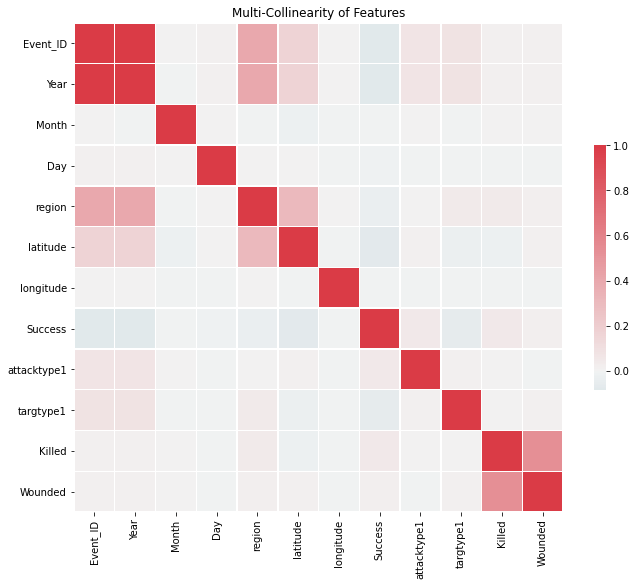

In [18]:
# Generating Corelation matrix using heat map
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')


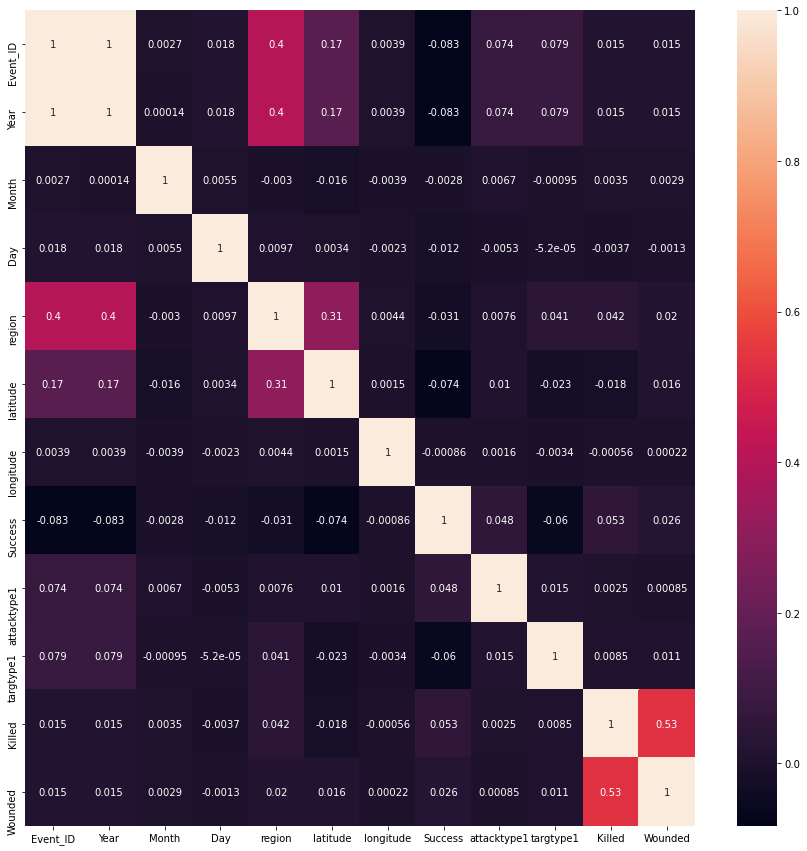

In [19]:
fig,axes = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(dataset.corr(), annot =True)
plt.show()

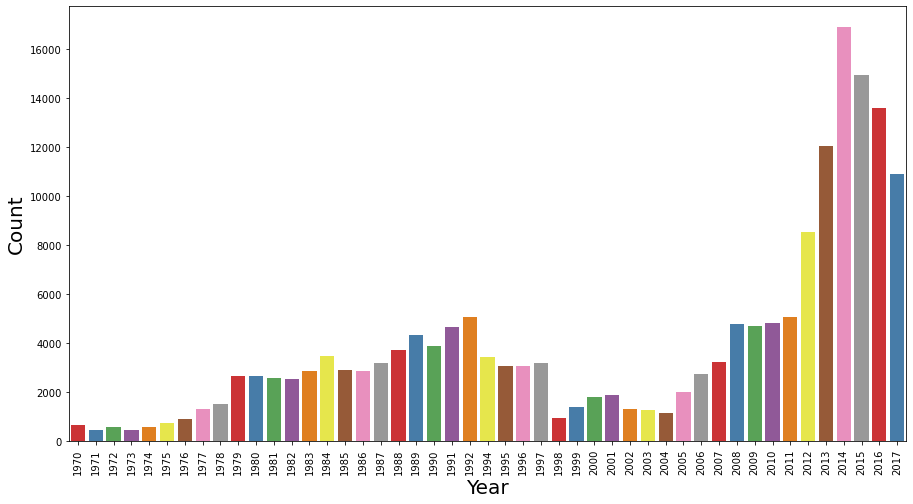

In [20]:
#Attacks year wise
plt.figure(figsize=(15,8))
sns.countplot(data = dataset, x = 'Year',palette='Set1')
plt.xticks(rotation=90)
plt.xlabel("Year",size=20)
plt.ylabel("Count",size=20)
plt.show()

Conclusion- Year 2014 has had the maximum terror attacks

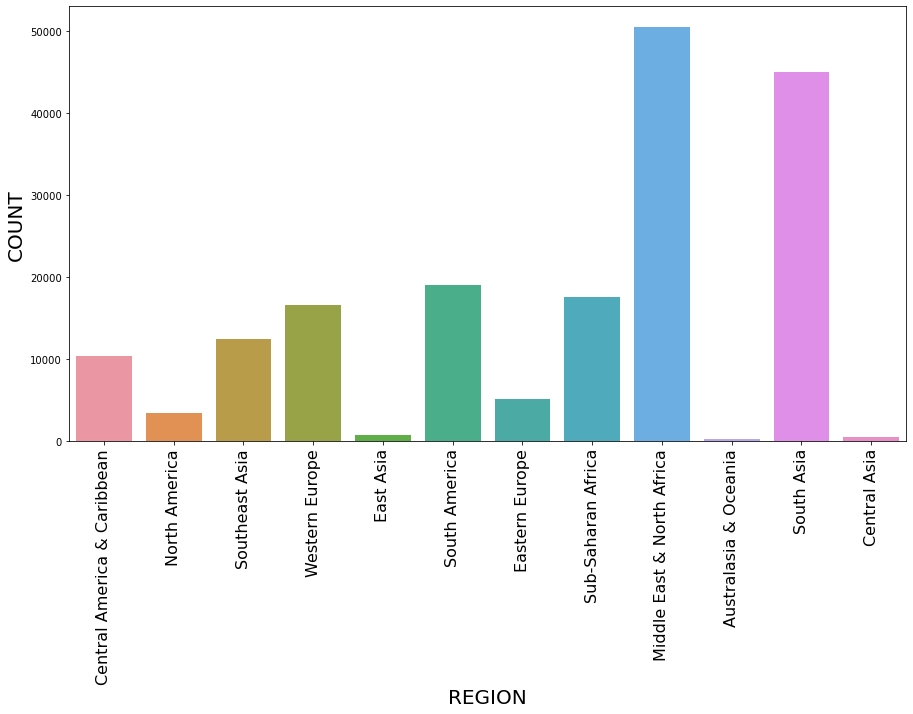

In [21]:
#Attack Region wise
plt.figure(figsize=(15,8))
sns.countplot(data = dataset, x='Region') 
plt.xticks(size = 16,rotation=90) 
plt.xlabel("REGION",size=20) 
plt.ylabel("COUNT",size=20) 
plt.show()

Conclusion- The region "Middle East & North Africa" has had the maximum terror attacks followed by South Asia

C:\Users\sonal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


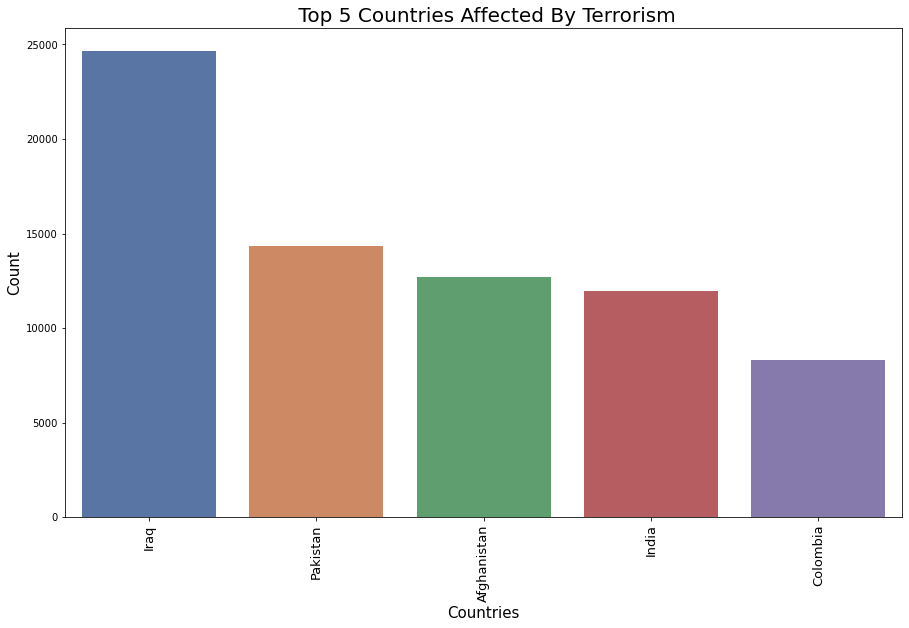

In [22]:
#Attack country wise
plt.figure(figsize=(15,9))
x = dataset['Country'].value_counts().index[:5]
y = dataset['Country'].value_counts().values[:5]
sns.barplot(x,y,palette='deep')
plt.title(' Top 5 Countries Affected By Terrorism',size=20)
plt.xlabel('Countries',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

Conclusion- The country affected the most is Iraq

C:\Users\sonal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


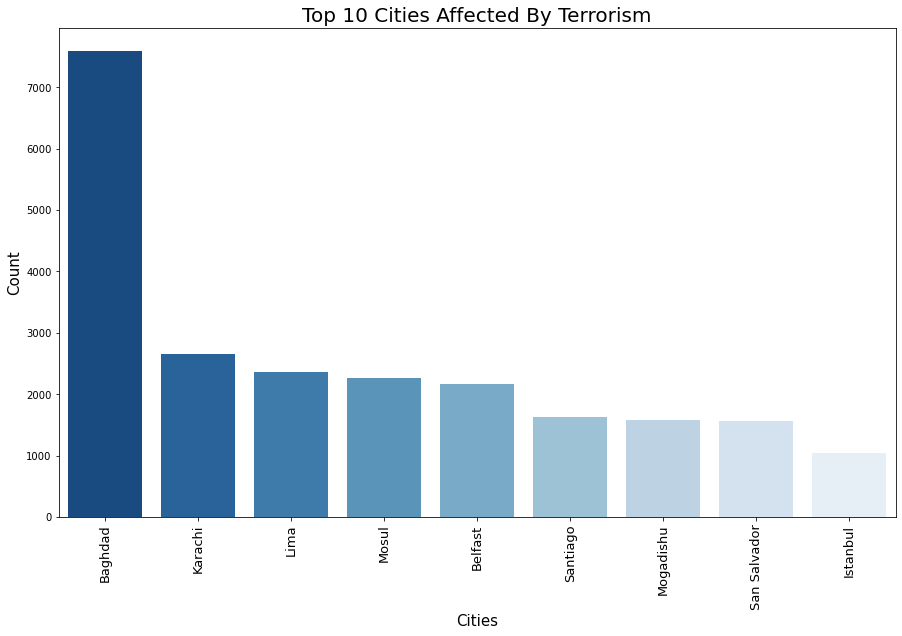

In [23]:
#Attack City wise
plt.figure(figsize=(15,9))
x =dataset['city'].value_counts().index[1:10]
y =dataset['city'].value_counts().values[1:10]
sns.barplot(x,y,palette='Blues_r')
plt.title('Top 10 Cities Affected By Terrorism',size=20)
plt.xlabel('Cities',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=13,rotation= 90)
plt.show()

Conclusion- The city affected the most is Baghdad

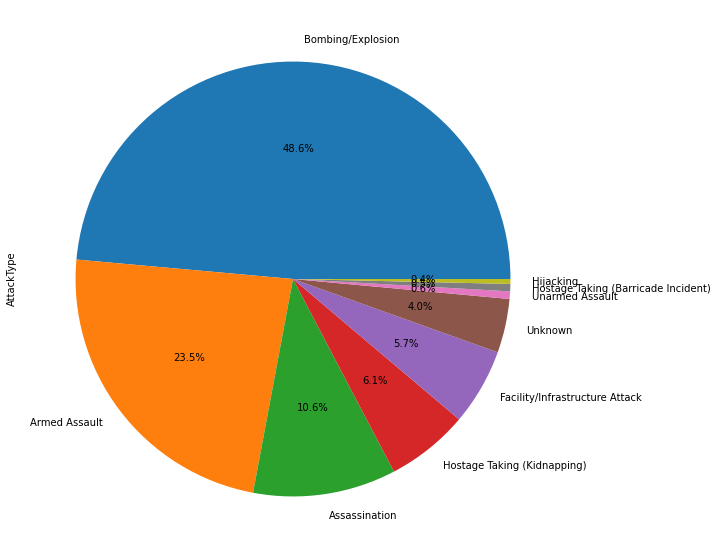

In [24]:
#Attack types
plt.figure(figsize=(10,10))
dataset['AttackType'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()


Conclusion- The most used attack type was Bombing/Explosion

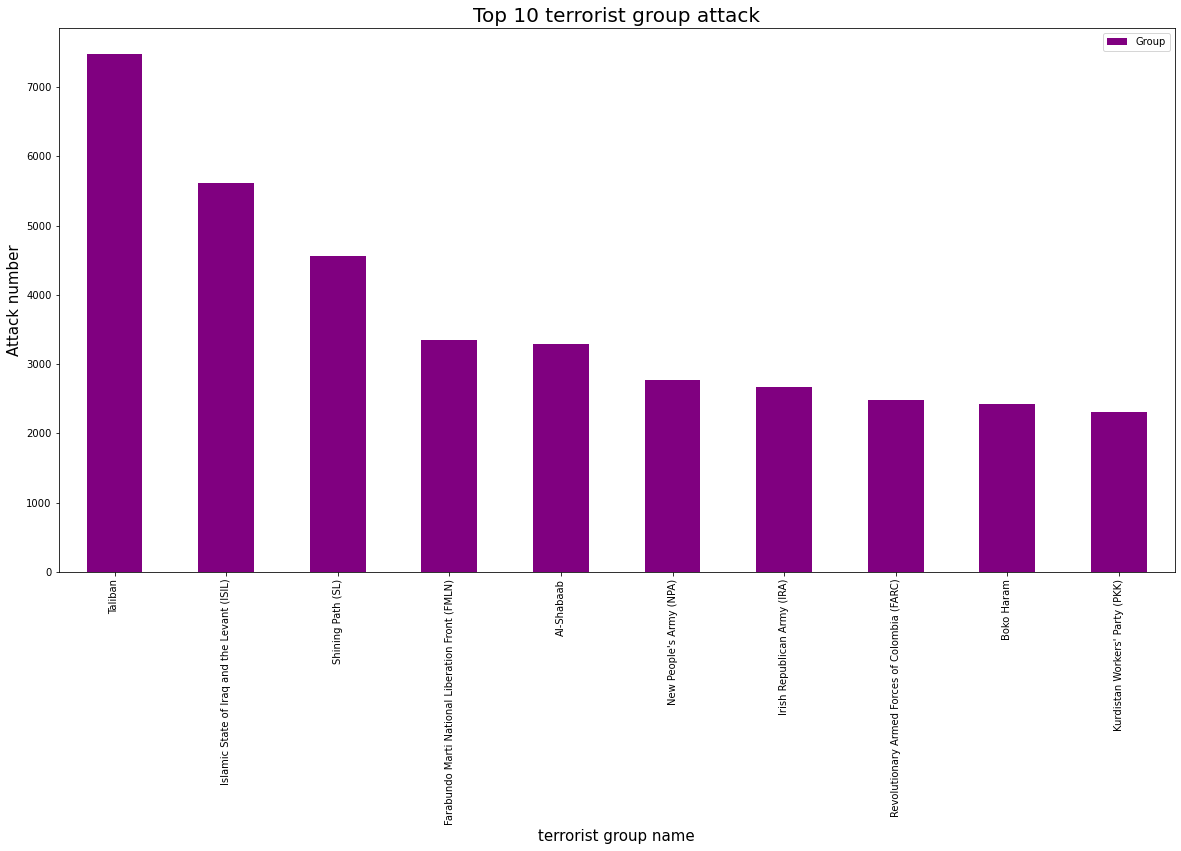

In [31]:
#Terrorist groups
dataset['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='purple',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

Conclusion-Taliban has carried out maximum attacks

In [26]:
#Target Type
Target = dataset['Target_type'].value_counts().nlargest(n=15)
Target

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: Target_type, dtype: int64

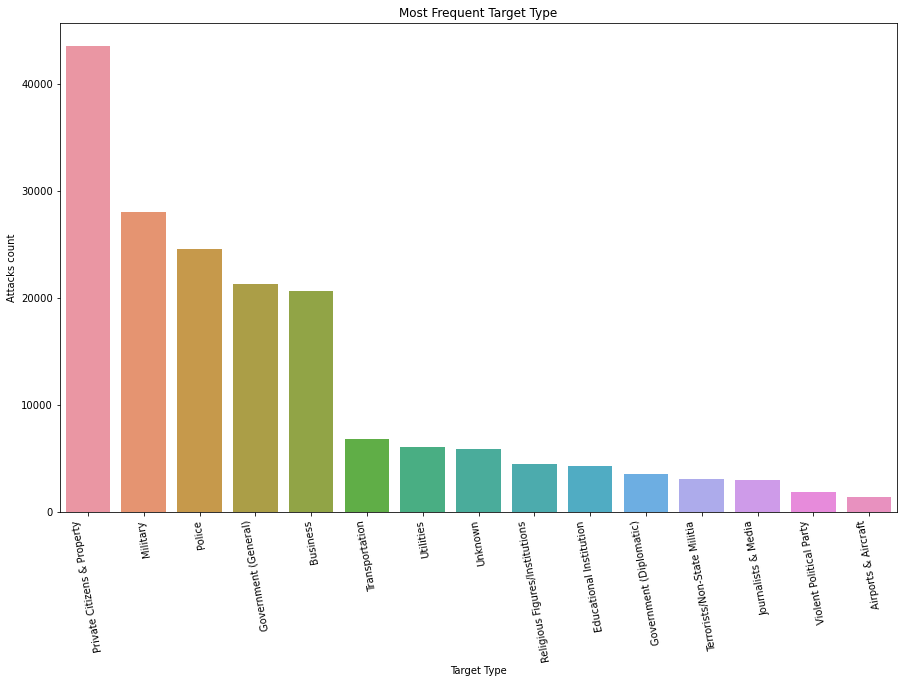

In [29]:
plt.figure(figsize= (15,9))
sns.barplot(x = Target.index , y = Target.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 100)
plt.show()

## Thankyou